# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: Leilani Guzman

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [198]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [199]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'south'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`.

In [200]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned

Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [201]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: east
step 1 - action: east
step 2 - action: east
step 3 - action: west
step 4 - action: north
step 5 - action: east
step 6 - action: north
step 7 - action: south
step 8 - action: south
step 9 - action: suck
step 10 - action: suck
step 11 - action: east
step 12 - action: suck
step 13 - action: north
step 14 - action: south
step 15 - action: east
step 16 - action: east
step 17 - action: east
step 18 - action: south
step 19 - action: north


3

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environmnt for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [268]:
room_size = 4
actions = ["north", "east", "west", "south", "suck"]

def simulation_environment(agent, room, verbose):
    num_steps = 0
    if (verbose):
        print("Room".center(room_size +10, "="))
        print(room)
    
    dirty_spots_left = np.sum(room)
    agent_location = [0,0] #x,y coordinates

    bumpers = {"north" : True, "south" : False, "west" : True, "east" : False} #starting in topleft corner
    while (dirty_spots_left > 0):
        # the agent only knows if it
        #  is on a dirty spot or not, and bumper information to decide an action
        action = agent(bumpers, room[agent_location[0], agent_location[1]])

        if (verbose):
            print("step", num_steps + 1, "- action:", action)
        if (action == "suck"  and room[agent_location[0], agent_location[1]] == 1):
            dirty_spots_left = dirty_spots_left - 1
            room[agent_location[0], agent_location[1]] = 0 #clean the spot
        
        #update agent location, rechecking bumpers since the dumb agent ignores the walls
        if (action == "north" and bumpers["north"] == False):
            agent_location[0] = agent_location[0] - 1 #go up one row
        elif (action == "south" and bumpers["south"] == False):
            agent_location[0] = agent_location[0] + 1 #go down one row
        elif (action == "east" and bumpers["east"] == False):
            agent_location[1] = agent_location[1] + 1 #go right one column
        elif (action == "west" and bumpers["west"] == False):   
            agent_location[1] = agent_location[1] - 1 #go left one column
        
        num_steps = num_steps + 1

        #update bumpers
        if (agent_location[1] == 0):
            bumpers["west"] = True          #0 x coordinate is the leftmost column/wall
        else:
            bumpers["west"] = False
        if (agent_location[1] == room_size - 1):
            bumpers["east"] = True          #room_size - 1 x coordinate is the rightmost column/wall
        else:
            bumpers["east"] = False
        if (agent_location[0] == 0):
            bumpers["north"] = True         # 0 y coordinate is the top row/wall
        else:   
            bumpers["north"] = False
        if (agent_location[0] == room_size - 1):
            bumpers["south"] = True         # room_size - 1 y coordinate is the bottom row/wall
        else:
            bumpers["south"] = False
        
        
    
    return num_steps
        
    

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [270]:
def simple_reflex_agent(bumpers, dirty):
    if (dirty):
        return "suck"
    else:
        #basic reflexes, go different direction away from the wall, if no wall go random
        #return a random direction where there is not a wall and not suck
        return np.random.choice([action for action in actions if action != "suck" and not bumpers[action]])


room_1 = np.random.choice([1, 0], size=(room_size, room_size), p=[0.2, 0.8]) #1 means dirty, 0 means clean
print("Room".center(room_size +10, "="))
print(room_1)
print('\nTotal steps: ' , simulation_environment(simple_reflex_agent, room_1, False))


=====Room=====
[[0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]]

Total steps:  30


## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [174]:
# Your short description of the state and your implementation goes here

In [272]:
#make a class for this agent to keep certain attributes across agent calls from the environment
class model_based_reflex_agent:
    def __init__(self):
        #need to use class variables to keep track of variables between each call from the environment
        self.current_position = (0,0)
        self.visited = []
        self.not_visited_queue = []
    
    def reset(self):
        self.current_position = (0,0)
        self.visited = []
        self.not_visited_queue = []

    def search(self, bumpers,dirty):
        # BFS approach to clean the room
        actions = {"north": [-1,0], "south" : [1,0], "west" : [0,-1], "east": [0,1]} #north, south, west, east

        if(self.current_position not in self.visited):
            self.visited.append(self.current_position) #add current position to visited list

        #remove current position from not visited queue if it's there, without the if the remove option would throw an error
        if (self.current_position in self.not_visited_queue):
            self.not_visited_queue.remove(self.current_position)
        
        
        #if not dirty then add adjacent spots to not visited queue
        for potential_spot in actions:
            #add the current position coordinate to the action coordinate to get the new spot
            new_spot = [self.current_position[x] + actions[potential_spot][x] for x in range(len(self.current_position))]

            if (bumpers[potential_spot] == False and new_spot not in self.visited and new_spot[0] >= 0 and new_spot[0] < room_size and new_spot[1] >= 0 and new_spot[1] < room_size):
                # print("new spots", new_spot)
                self.not_visited_queue.append(new_spot)

        if dirty:
            return "suck"
        
        old_spot = self.current_position

        #make current position the last element of the queue
        self.current_position = self.not_visited_queue[-1]

        #return the direction to move (north, south, east, west)
        if (self.current_position[0] > old_spot[0]):
            return "south"
        elif (self.current_position[0] < old_spot[0]):
            return "north"
        elif (self.current_position[1] > old_spot[1]):
            return "east"
        elif (self.current_position[1] < old_spot[1]):
            return "west"


room_1 = np.random.choice([1, 0], size=(room_size, room_size), p=[0.2, 0.8]) #1 means dirty, 0 means clean
smart_agent = model_based_reflex_agent()
print("Room".center(room_size +10, "="))
print(room_1)
print('\nTotal steps: ' , simulation_environment(smart_agent.search, room_1, False))
smart_agent.reset()

=====Room=====
[[0 0 0 1]
 [1 1 0 1]
 [0 0 0 1]
 [0 0 1 0]]

Total steps:  19


## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [134]:
randomized_agent_steps_5 = []
reflex_agent_steps_5 = []
model_agent_steps_5 = []
randomized_agent_steps_10 = []
reflex_agent_steps_10 = []
model_agent_steps_10 = []
randomized_agent_steps_100 = []
reflex_agent_steps_100 = []
model_agent_steps_100 = []

#5x5 room
room_size = 5
for trial in range (100):
    room_1 = np.random.choice([1, 0], size=(room_size, room_size), p=[0.2, 0.8])
    room_2 = room_1.copy()
    room_3 = room_1.copy()
    randomized_agent_steps_5.append(simulation_environment(simple_randomized_agent, room_1, False))
    reflex_agent_steps_5.append(simulation_environment(simple_reflex_agent, room_2, False))
    model_agent_steps_5.append(simulation_environment(smart_agent.search, room_3, False))
    smart_agent.reset() #reset the agent for the next trial

#10x10 room
room_size = 10
for trial in range (100):
    room_1 = np.random.choice([1, 0], size=(room_size, room_size), p=[0.2, 0.8])
    room_2 = room_1.copy()
    room_3 = room_1.copy()
    randomized_agent_steps_10.append(simulation_environment(simple_randomized_agent, room_1, False))
    reflex_agent_steps_10.append(simulation_environment(simple_reflex_agent, room_2, False))
    model_agent_steps_10.append(simulation_environment(smart_agent.search, room_3, False))
    smart_agent.reset()

#100x100 room
room_size = 100
for trial in range (100):
    room_1 = np.random.choice([1, 0], size=(room_size, room_size), p=[0.2, 0.8])
    room_2 = room_1.copy()
    room_3 = room_1.copy()
    randomized_agent_steps_100.append(simulation_environment(simple_randomized_agent, room_1, False))
    reflex_agent_steps_100.append(simulation_environment(simple_reflex_agent, room_2, False))
    model_agent_steps_100.append(simulation_environment(smart_agent.search, room_3, False))
    smart_agent.reset()  

In [ ]:
import pandas as pd

#make a table of the results, with columns for each agent, and rows for each room size

table = pd.DataFrame(columns = ["Randomized Agent", "Reflex Agent", "Model Based Agent"], index = ["5x5", "10x10", "100x100"])
table["Randomized Agent"] = [np.mean(randomized_agent_steps_5), np.mean(randomized_agent_steps_10), np.mean(randomized_agent_steps_100)]
table["Reflex Agent"] = [np.mean(reflex_agent_steps_5), np.mean(reflex_agent_steps_10), np.mean(reflex_agent_steps_100)]
table["Model Based Agent"] = [np.mean(model_agent_steps_5), np.mean(model_agent_steps_10), np.mean(model_agent_steps_100)]
print(table)


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | | |
| 10x10   | | | |
| 100x100 | | | |

Add charts to compare the performance of the different agents.

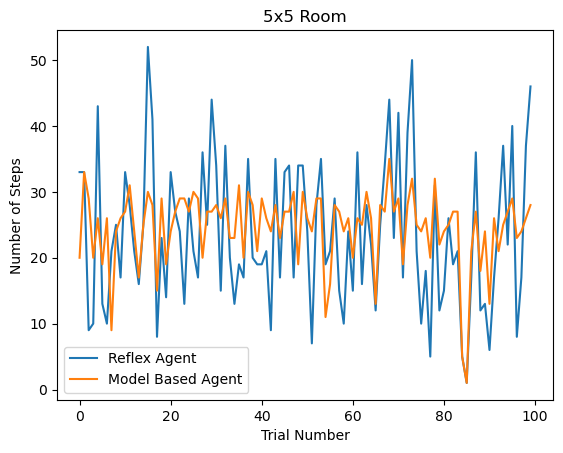

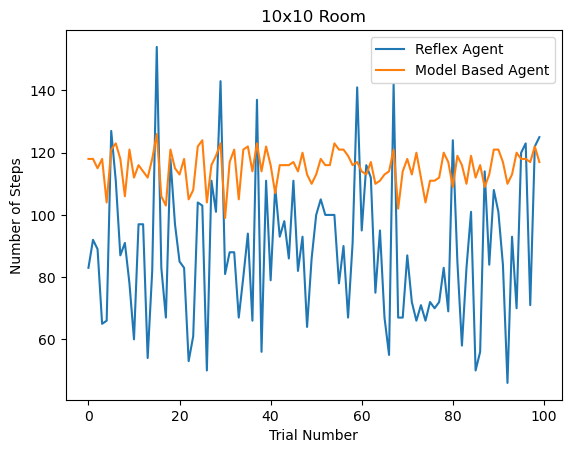

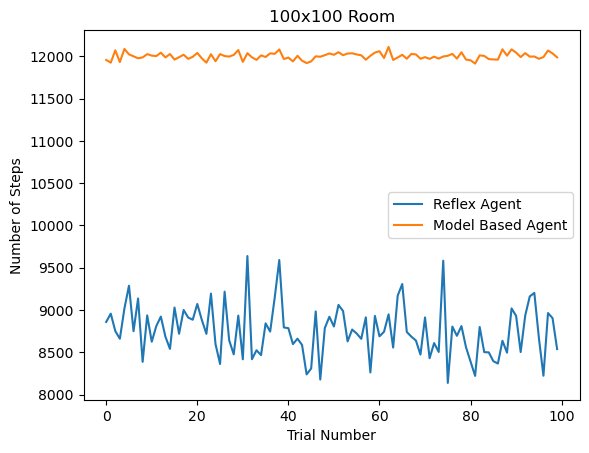

In [136]:
# Your graphs and discussion of the results goes here
import matplotlib.pyplot as plt

# compare reflex agent and model based agent for each room size
# 5x5 room
plt.figure()
plt.title("5x5 Room")
plt.xlabel("Trial Number")
plt.ylabel("Number of Steps")
plt.plot(randomized_agent_steps_5, label = "Randomized Agent")
plt.plot(reflex_agent_steps_5, label = "Reflex Agent")
plt.plot(model_agent_steps_5, label = "Model Based Agent")
plt.legend()
plt.show()

# 10x10 room
plt.figure()
plt.title("10x10 Room")
plt.xlabel("Trial Number")
plt.ylabel("Number of Steps")
plt.plot(randomized_agent_steps_10, label = "Randomized Agent")
plt.plot(reflex_agent_steps_10, label = "Reflex Agent")
plt.plot(model_agent_steps_10, label = "Model Based Agent")
plt.legend()
plt.show()

# 100x100 room
plt.figure()
plt.title("100x100 Room")
plt.xlabel("Trial Number")
plt.ylabel("Number of Steps")
plt.plot(randomized_agent_steps_100, label = "Randomized Agent")
plt.plot(reflex_agent_steps_100, label = "Reflex Agent")
plt.plot(model_agent_steps_100, label = "Model Based Agent")
plt.legend()
plt.show()


## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

# Answer goes here

1.1 How will the simple_reflex_agent perform in a rectangular room?
    
    The overall performance of this reflex agent will depend on the exact dimension of this rectangular room and the general distribution of the dirty spots. If the room is very large it will take a lot longer to clean, and if the distribtion is sparse it may take longer for the agent to find the dirty spots since it has no logical navigation abilities. 

1.2 How will the model-based_reflex_agent perform in a rectangular room?

2.1 How will the simple_reflex_agent perform in a room with an irregular shape?

2.2 How will the model-based_reflex_agent perform in a room with an irregular shape?

3.1 How will the simple_reflex_agent perform in a room with obstacles?

3.2 How will the model-based_reflex_agent perform in a room with obstacles?


## Graduate student advanced task: Obstacles [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can.

In [273]:
# make new environment that will include obstacles that trigger the bumpers
# same as previous environment, except the bumpers will be set to true if there is an obstacle (-1) or a regular wall

def new_simulation_environment(agent, room, verbose):
    num_steps = 0
    if (verbose):
        print("Room".center(room_size +10, "="))
        print(room)
    
    dirty_spots_left = np.sum(room == 1)
    agent_location = [0,0] #x,y coordinates

    bumpers = {"north" : True, "south" : False, "west" : True, "east" : False} #starting in topleft corner
    #obstacles are now represented by -1
    while (dirty_spots_left > 0):
        # the agent only knows if it is on a dirty spot or not and has bumper information to decide an action
        action = agent(bumpers, room[agent_location[0], agent_location[1]])

        if (verbose):
            print("step", num_steps , "- action:", action)
        if (action == "suck" and room[agent_location[0], agent_location[1]] == 1):
            # only suck if the spot is dirty, otherwise the dumb agent thinks it dirty and cleans anyway
            dirty_spots_left = dirty_spots_left - 1
            room[agent_location[0], agent_location[1]] = 0 #clean the spot
        
        #update agent location, rechecking bumpers since the dumb agent ignores the walls
        if (action == "north" and bumpers["north"] == False):
            agent_location[0] = agent_location[0] - 1 #go up one row
        elif (action == "south" and bumpers["south"] == False):
            agent_location[0] = agent_location[0] + 1 #go down one row
        elif (action == "east" and bumpers["east"] == False):
            agent_location[1] = agent_location[1] + 1 #go right one column
        elif (action == "west" and bumpers["west"] == False):   
            agent_location[1] = agent_location[1] - 1 #go left one column
        
        num_steps = num_steps + 1

        #update bumpers, also set bumper true if it detects an obstacle (-1)
        if (agent_location[1] == 0 or room[agent_location[0], agent_location[1] - 1] == -1):
            bumpers["west"] = True          #0 x coordinate is the leftmost column/wall
        else:
            bumpers["west"] = False
        if (agent_location[1] == room_size - 1 or room[agent_location[0], agent_location[1] + 1] == -1):
            bumpers["east"] = True          #room_size - 1 x coordinate is the rightmost column/wall
        else:
            bumpers["east"] = False
        if (agent_location[0] == 0 or room[agent_location[0] - 1, agent_location[1]] == -1):
            bumpers["north"] = True         # 0 y coordinate is the top row/wall
        else:   
            bumpers["north"] = False
        if (agent_location[0] == room_size - 1 or room[agent_location[0] + 1, agent_location[1]] == -1):
            bumpers["south"] = True         # room_size - 1 y coordinate is the bottom row/wall
        else:
            bumpers["south"] = False
        
    
    return num_steps


In [274]:
room_size = 4 #set a room size for basic testing

#make a random room where 1 is dirty, 0 is clean, -1 is an obstacle
room_1 = np.random.choice([1, 0, -1], size=(room_size, room_size), p=[0.2, 0.7, 0.1])
room_1[0,0] = np.random.choice([1, 0], p=[0.2, 0.8]) #make sure starting spot is not an obstacle
room_2 = room_1.copy()
room_3 = room_1.copy()


smart_agent.reset()
print("Testing simple_randomized_agent with obstacles".center(room_size +10, "="))
print(room_1)
print('\nTotal steps: ' , new_simulation_environment(simple_randomized_agent, room_1, False))

print("Testing simple_reflex_agent with obstacles".center(room_size +10, "="))
print(room_2)
print('\nTotal steps: ' , new_simulation_environment(simple_reflex_agent, room_2, False))

print("Testing model_based_reflex_agent with obstacles".center(room_size +10, "="))
print(room_3)
smart_agent.reset()
print('\nTotal steps: ' , new_simulation_environment(smart_agent.search, room_3, False))

Testing simple_randomized_agent with obstacles
[[ 0  0  0  0]
 [ 0  1  0  0]
 [ 0  0  0 -1]
 [ 0 -1  1  0]]

Total steps:  283
Testing simple_reflex_agent with obstacles
[[ 0  0  0  0]
 [ 0  1  0  0]
 [ 0  0  0 -1]
 [ 0 -1  1  0]]

Total steps:  21
Testing model_based_reflex_agent with obstacles
[[ 0  0  0  0]
 [ 0  1  0  0]
 [ 0  0  0 -1]
 [ 0 -1  1  0]]

Total steps:  13


In [ ]:
#Observing the performance of each agent when obstacles are present. Using smaller number of trials than before
randomized_agent_steps_5 = []
reflex_agent_steps_5 = []
model_agent_steps_5 = []
randomized_agent_steps_10 = []
reflex_agent_steps_10 = []
model_agent_steps_10 = []
randomized_agent_steps_100 = []
reflex_agent_steps_100 = []
model_agent_steps_100 = []

#5x5 room
room_size = 5
for trial in range (100):
    room_1 = np.random.choice([1, 0], size=(room_size, room_size), p=[0.2, 0.8])
    room_2 = room_1.copy()
    room_3 = room_1.copy()
    randomized_agent_steps_5.append(new_simulation_environment(simple_randomized_agent, room_1, False))
    reflex_agent_steps_5.append(new_simulation_environment(simple_reflex_agent, room_2, False))
    model_agent_steps_5.append(new_simulation_environment(smart_agent.search, room_3, False))
    smart_agent.reset() #reset the agent for the next trial

#10x10 room
room_size = 10
for trial in range (100):
    room_1 = np.random.choice([1, 0], size=(room_size, room_size), p=[0.2, 0.8])
    room_2 = room_1.copy()
    room_3 = room_1.copy()
    randomized_agent_steps_10.append(new_simulation_environment(simple_randomized_agent, room_1, False))
    reflex_agent_steps_10.append(new_simulation_environment(simple_reflex_agent, room_2, False))
    model_agent_steps_10.append(new_simulation_environment(smart_agent.search, room_3, False))
    smart_agent.reset()

#100x100 room
room_size = 100
for trial in range (100):
    room_1 = np.random.choice([1, 0], size=(room_size, room_size), p=[0.2, 0.8])
    room_2 = room_1.copy()
    room_3 = room_1.copy()
    randomized_agent_steps_100.append(new_simulation_environment(simple_randomized_agent, room_1, False))
    reflex_agent_steps_100.append(new_simulation_environment(simple_reflex_agent, room_2, False))
    model_agent_steps_100.append(new_simulation_environment(smart_agent.search, room_3, False))
    smart_agent.reset()  

In [ ]:
#make a table of the results, with columns for each agent, and rows for each room size

table = pd.DataFrame(columns = ["Randomized Agent", "Reflex Agent", "Model Based Agent"], index = ["5x5", "10x10", "100x100"])
table["Randomized Agent"] = [np.mean(randomized_agent_steps_5), np.mean(randomized_agent_steps_10), np.mean(randomized_agent_steps_100)]
table["Reflex Agent"] = [np.mean(reflex_agent_steps_5), np.mean(reflex_agent_steps_10), np.mean(reflex_agent_steps_100)]
table["Model Based Agent"] = [np.mean(model_agent_steps_5), np.mean(model_agent_steps_10), np.mean(model_agent_steps_100)]
print(table)

## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actualy depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currebntly clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code